<a href="https://colab.research.google.com/github/Labcet/Trading-Bitcoin/blob/main/Trading_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar los modulos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#BTC DATA

btc_data_path = '../content/drive/MyDrive/BTC/BTC_DATA.xlsx'
btc_data = pd.read_excel(btc_data_path)
btc_data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03,1096.000000
mean,6275.373923,6474.501031,6046.950392,6281.060219,10611.170347,6.905567e+07,6261.069161
std,3504.727505,3648.847023,3310.372210,3500.733393,7442.875695,7.297040e+07,3476.741305
min,778.700000,823.450000,751.340000,778.620000,839.300000,1.078885e+06,783.460000
25%,3630.162500,3769.850000,3551.190000,3636.512500,5449.692500,2.402019e+07,3623.760000
50%,6410.675000,6536.285000,6323.685000,6412.410000,8904.045000,4.515002e+07,6418.390000
75%,8404.620000,8649.950000,8114.322500,8405.727500,13692.207500,8.903540e+07,8405.602500
max,19187.780000,19666.000000,18465.000000,19187.780000,70961.370000,7.721430e+08,19110.240000


In [3]:
btc_data.sample(10)

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
671,2018-11-02,6343.85,6381.25,6328.33,6350.43,2678.07,1.701202e+07,6352.34
631,2018-09-23,6710.01,6774.91,6659.00,6702.22,3248.80,2.179728e+07,6709.32
282,2017-10-09,4597.97,4865.00,4541.00,4764.70,12923.67,6.047321e+07,4679.26
1075,2019-12-11,7224.50,7271.00,7122.28,7207.42,3419.94,2.464308e+07,7205.71
412,2018-02-16,10011.30,10300.00,9707.51,10196.00,11857.64,1.188604e+08,10023.95
7,2017-01-07,894.02,907.05,812.28,906.20,20401.11,1.762431e+07,863.89
175,2017-06-24,2685.05,2724.96,2512.13,2557.66,13342.82,3.494480e+07,2619.00
907,2019-06-26,11760.00,13880.00,11647.07,12920.54,37487.80,4.769830e+08,12723.69
293,2017-10-20,5700.00,6074.00,5589.80,5977.29,15109.06,8.901430e+07,5891.45
714,2018-12-15,3194.04,3230.00,3122.28,3179.54,5814.87,1.844315e+07,3171.72


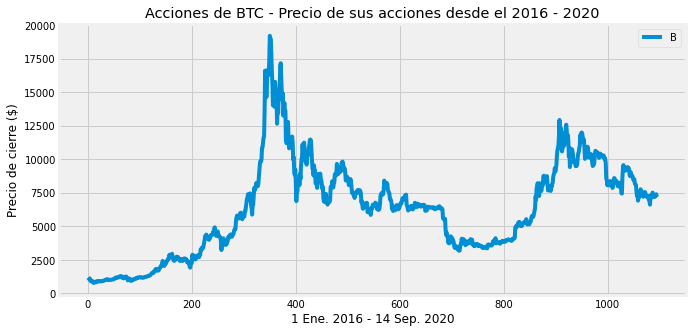

In [4]:
# Graficar los datos
plt.figure(figsize = (10, 5))
plt.plot(btc_data['Close'], label = 'Google Stock')
plt.title('Acciones de BTC - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend('Bitcoin')
plt.show()

In [5]:
MVS30 = pd.DataFrame()
MVS30['Close'] = btc_data['Close'].rolling(window = 30).mean()
MVS30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1091,7276.156000
1092,7271.473333
1093,7259.201667
1094,7248.187333


In [6]:
MVS30[MVS30.index == 29]

,Close
29,910.620667


In [7]:
MVS100 = pd.DataFrame()
MVS100['Close'] = btc_data['Close'].rolling(window = 100).mean()
MVS100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1091,8133.1832
1092,8103.4303
1093,8075.5955
1094,8047.9451


In [8]:
MVS100[MVS100.index == 99]

,Close
99,1043.1445


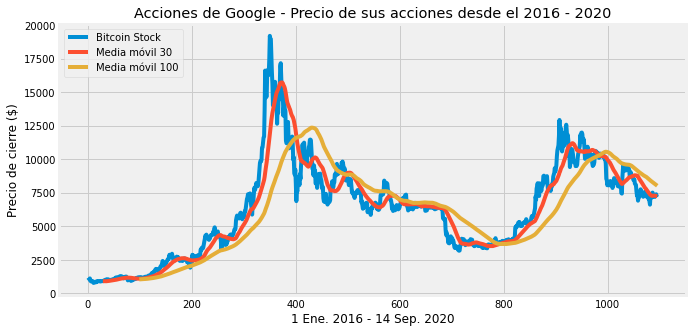

In [9]:
# Graficar los datos
plt.figure(figsize = (10, 5))
plt.plot(btc_data['Close'], label = 'Bitcoin Stock')
plt.plot(MVS30['Close'], label = 'Media móvil 30')
plt.plot(MVS100['Close'], label = 'Media móvil 100')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
data = pd.DataFrame()
data['Bitcoin'] = btc_data['Close']
data['MVS30'] = MVS30['Close']
data['MVS100'] = MVS100['Close']
data

,Bitcoin,MVS30,MVS100
0,966.30,NaN,NaN
1,997.75,NaN,NaN
2,1012.54,NaN,NaN
3,1035.24,NaN,NaN
4,1114.92,NaN,NaN
...,...,...,...
1091,7246.00,7276.156000,8133.1832
1092,7296.24,7271.473333,8103.4303
1093,7385.54,7259.201667,8075.5955
1094,7220.24,7248.187333,8047.9451


In [11]:
def senal(data):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data['MVS30'][dia] > data['MVS100'][dia]:
            if condicion != 1:
                compra.append(data['Bitcoin'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data['MVS30'][dia] < data['MVS100'][dia]:
            if condicion != -1:
                venta.append(data['Bitcoin'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)    

In [12]:
senales = senal(data)
data['Compra'] = senales[0]
data['Venta'] = senales[1]
data

,Bitcoin,MVS30,MVS100,Compra,Venta
0,966.30,NaN,NaN,NaN,NaN
1,997.75,NaN,NaN,NaN,NaN
2,1012.54,NaN,NaN,NaN,NaN
3,1035.24,NaN,NaN,NaN,NaN
4,1114.92,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1091,7246.00,7276.156000,8133.1832,NaN,NaN
1092,7296.24,7271.473333,8103.4303,NaN,NaN
1093,7385.54,7259.201667,8075.5955,NaN,NaN
1094,7220.24,7248.187333,8047.9451,NaN,NaN


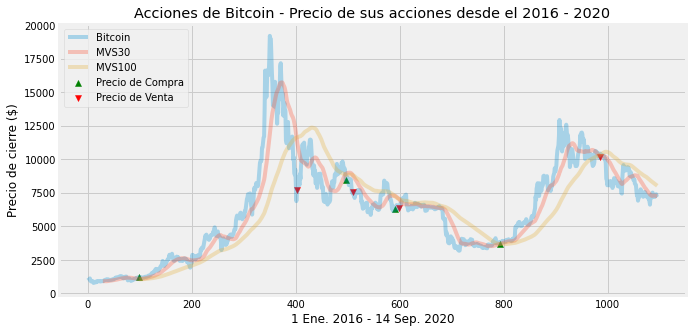

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(data['Bitcoin'], label = 'Bitcoin', alpha = 0.3)
plt.plot(data['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data.index, data['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data.index, data['Venta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Acciones de Bitcoin - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()